<a href="https://colab.research.google.com/github/1kruidenp/PRA3024/blob/master/Week_2_Beg_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code is based off of a beginner tutorial from TESS. This code will be analyzing a known plant, WASP-63 b, as the tutorial did for WASP-18 b. The code will be explained in comments (in green) and so will any adjustments.

This code is based off of a tutorial written by author: Susan E. Mullally

In [0]:
#Here we install the packages necessary for the code to be able to run.
#The last three lines are references where all the data will be retrieved from. This is done in later blocks.

import numpy as np
import requests
import matplotlib.pyplot as plt
import pandas as p
from IPython.display import display, HTML

%matplotlib inline

planeturl = "https://exo.mast.stsci.edu/api/v0.1/exoplanets/"
dvurl = "https://exo.mast.stsci.edu/api/v0.1/dvdata/tess/"
header={}

In [11]:
#Here the data is retrieved from exomast using the reference above.
#The output is a json file which can be converted to a python dictionary

planet_name = "WASP-63 b" #This is where the name is changed to the planet chosen.

url = planeturl + "/identifiers/"

myparams = {"name":planet_name)

r = requests.get(url = url, params = myparams, headers = header)
print(r.headers.get('content-type'))

application/json; charset=UTF-8


In [12]:
#Here the insides of the dictionary is printed.
#You can see that the correct planet is printed, as well as some basic information about the planet.

planet_names = r.json()
ticid = planet_names['tessID']
tce = planet_names['tessTCE']
planet_names

{'canonicalName': 'WASP-63 b',
 'dec': -38.32327777756586,
 'keplerID': None,
 'keplerTCE': None,
 'planetNames': ['TYC 7612-556-1 b',
  'Gaia DR1 5574766463859305344 b',
  'WASP-63 b',
  '1SWASP J061720.74-381923.8 b',
  'GSC 07612-00556 b',
  '2MASS J06172074-3819237 b'],
 'ra': 94.33644166787464,
 'starName': 'WASP-63',
 'tessID': 393414358,
 'tessTCE': 'TCE_1'}

In [13]:
#Here the properties of the planet WASP-63 b is printed. The information comes from two databases which the json file has taken information from.
#These two databases are NExScI and Exoplanets.org

url = planeturl + planet_name + "/properties/"

r = requests.get(url = url, headers = header)

planet_prop = r.json()

print("Catalog 1: " + planet_prop[0]['catalog_name'])
print("Catalog 2: " + planet_prop[1]['catalog_name'])
planet_prop[0].keys()

Catalog 1: exoplanets.org
Catalog 2: nexsci


dict_keys(['canonical_name', 'exoplanetID', 'catalog_name', 'planet_name', 'disposition', 'modified_date', 'star_name', 'component', 'Rs', 'Rs_unit', 'Rs_upper', 'Rs_lower', 'Rs_ref', 'Rs_url', 'Ms', 'Ms_unit', 'Ms_upper', 'Ms_lower', 'Ms_ref', 'Ms_url', 'Fe/H', 'Fe/H_upper', 'Fe/H_lower', 'Fe/H_ref', 'Fe/H_url', 'stellar_gravity', 'stellar_gravity_upper', 'stellar_gravity_lower', 'stellar_gravity_ref', 'stellar_gravity_url', 'Teff', 'Teff_unit', 'Teff_upper', 'Teff_lower', 'Teff_ref', 'Teff_url', 'Vmag', 'Vmag_unit', 'Vmag_upper', 'Vmag_lower', 'Vmag_ref', 'Vmag_url', 'Jmag', 'Jmag_unit', 'Jmag_upper', 'Jmag_lower', 'Jmag_ref', 'Jmag_url', 'Hmag', 'Hmag_unit', 'Hmag_upper', 'Hmag_lower', 'Hmag_ref', 'Hmag_url', 'Kmag', 'Kmag_unit', 'Kmag_upper', 'Kmag_lower', 'Kmag_ref', 'Kmag_url', 'RA', 'DEC', 'distance', 'distance_unit', 'distance_upper', 'distance_lower', 'distance_ref', 'distance_url', 'Rp', 'Rp_unit', 'Rp_upper', 'Rp_lower', 'Rp_ref', 'Rp_url', 'Mp', 'Mp_unit', 'Mp_upper', 'Mp_l

In [14]:
#This code of block shows how properties can be taken out of the array shown above.
#All that needs to be done is call the correct name of the property.
print("WASP-18 b Properties")
print("Stellar Mass %f %s" % (planet_prop[0]['Ms'], planet_prop[0]['Ms_unit'] ) )
print("Planet Mass %f %s" % (planet_prop[0]['Mp'], planet_prop[0]['Mp_unit'] ) )
print("Planet Mass Reference: %s" % (planet_prop[0]['Mp_ref']))

WASP-18 b Properties
Stellar Mass 1.320000 M_sun
Planet Mass 0.378096 M_Jupiter
Planet Mass Reference: Calculated from MSINI and I


In [15]:
#Here we retrieve data that corresponds to the TCE of the planet. 
#When TESS is recording, and notices an abnormal event occuring that could show a sign of a planet it records it as a TCE.
#In the print below, it shows in which sectors these TCE were noticed.
url = dvurl + str(ticid) + '/tces/'
myparams = {"tce" : tce}

r = requests.get(url = url, params = myparams, headers = header)
sectorInfo = r.json()

sectors = [x[:11] for x in sectorInfo["TCE"] if tce in x]
sectors

['s0001-s0009', 's0006-s0006', 's0007-s0007']

In [16]:
#Using the sectors found above, we can specify what data TESS noticed from the TCE.
#Below the planet radius and TIC of the planet is printed.

url = dvurl + str(ticid) + '/info/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)
tceInfo = r.json()
tceInfo.keys()
tceInfo['DV Data Header'].keys()

print("TIC: %s" % tceInfo['DV Primary Header']['OBJECT'])
print("Planet Radius: %f" % tceInfo['DV Data Header']['PRADIUS'])


TIC: TIC 393414358
Planet Radius: 15.699976


In [0]:

# Finally here the data of the planet is obtained from the json file, and in the correct sector found above.
url = dvurl + str(ticid) + '/table/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)
tce_data = r.json()

In [18]:
#Here the data obtained is printed out.
data = p.DataFrame.from_dict(tce_data['data'])
data.columns

Index(['TICID', 'EXTNAME', 'TIME', 'TIMECORR', 'CADENCENO', 'PHASE', 'LC_INIT',
       'LC_INIT_ERR', 'LC_WHITE', 'LC_DETREND', 'MODEL_INIT', 'MODEL_WHITE',
       'DATE_OBS', 'TESSDatetime', 'SECTORS'],
      dtype='object')

Text(0, 0.5, 'Relative Flux')

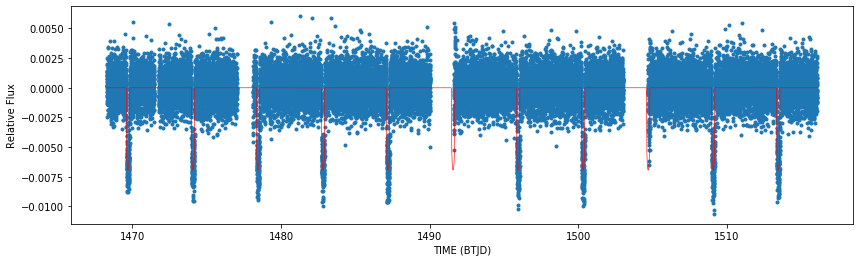

In [19]:
#The data found above is then graphed under this block. 
#In red you will see a model of the actual data, this was also retried from the json file and is called MODEL_INIT
#The drops in the relative flux show the signs of something happening, this triggers the TCE.
#I believe these drops corrspond to the WASP-63 b transitting a star.

detrend = data['LC_DETREND']
model = data['MODEL_INIT']
time = data['TIME']

plt.figure(figsize=(14,4))
plt.plot(time,detrend,'.',lw=0.4)
plt.plot(time,model,'r-',lw=0.6)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Relative Flux')

In [0]:
#The two blocks below are a different method of plotting data called phased Bokeh light curve. 
#It shows the flux but then tuned at the period of the TCE, so that it overlaps the data for a more accurate model.

url = dvurl + str(ticid) + '/phaseplot/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)

In [21]:
display(HTML(str(r.content.decode('utf-8'))))